In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

In [2]:
labels = ['box', 'chevron', 'rounded']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
train = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/TRAIN')
test = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/TEST')
val = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/VAL')

<ipython-input-2-cb03198c4750>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

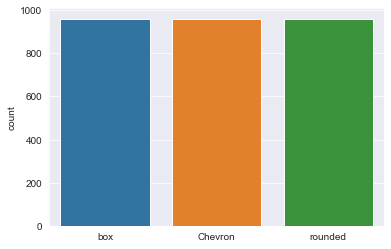

In [3]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("Chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

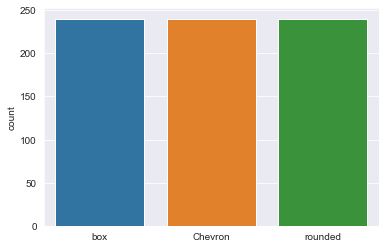

In [4]:
l = []
for i in val:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("Chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

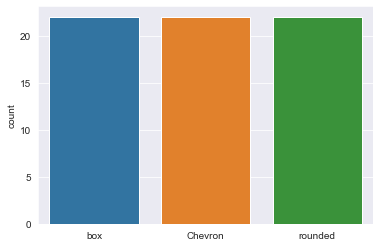

In [5]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("box")
    elif(i[1] == 1):
        l.append("Chevron")
    else:
        l.append("rounded")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'box')

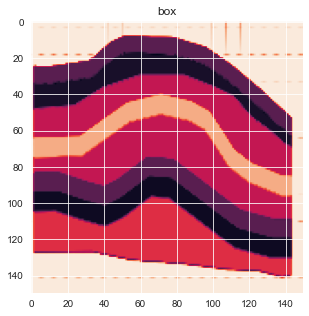

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'box')

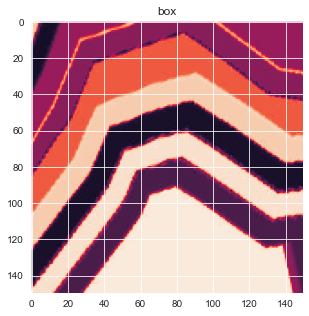

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[100][0])
plt.title(labels[train[100][1]])

Text(0.5, 1.0, 'rounded')

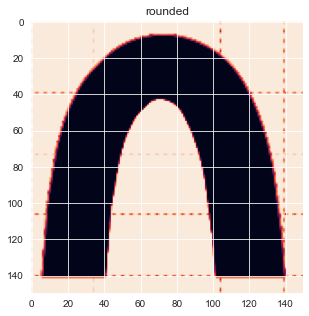

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[2000][0])
plt.title(labels[train[2000][1]])

Text(0.5, 1.0, 'rounded')

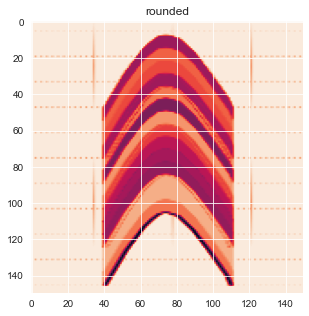

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[2500][0])
plt.title(labels[train[2500][1]])

Text(0.5, 1.0, 'rounded')

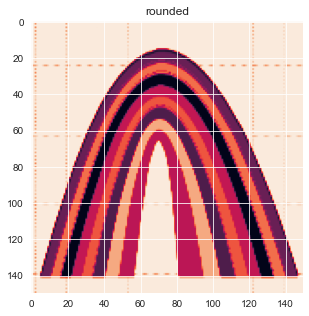

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(train[2800][0])
plt.title(labels[train[2800][1]])

Text(0.5, 1.0, 'chevron')

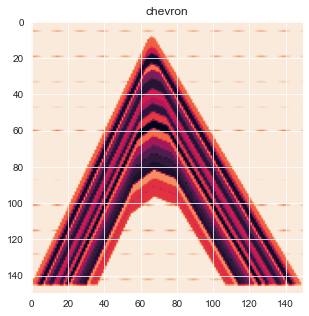

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[1500][0])
plt.title(labels[train[1500][1]])

In [12]:
#(X_train, y_train) = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/TRAIN/')
# # (X_val, y_val) = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/VAL')
# # (X_test, y_test) = get_data('C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/TEST')

In [13]:
# fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
# index = 0
# for i in range(3):
#     for j in range(7):
#         #axes[i,j].set_title(labels[y_train[index][0]])
#         axes[i,j].imshow(X_train[index])
#         axes[i,j].get_xaxis().set_visible(False)
#         axes[i,j].get_yaxis().set_visible(False)
#         index += 1
# plt.show()

In [14]:
# fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
# index = 0
# for i in range(3):
#     for j in range(7):
#         #axes[i,j].set_title(labels[y_train[index][0]])
#         axes[i,j].imshow(train[index], cmap='gray')
#         axes[i,j].get_xaxis().set_visible(False)
#         axes[i,j].get_yaxis().set_visible(False)
#         index += 1
# plt.show()

In [15]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(512 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.3))
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(units = 3 , activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [18]:
model.compile(optimizer = "Adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [19]:
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D,\
#      Dropout,Flatten,Dense,Activation,\
#      BatchNormalization


# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.25))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.25))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(2,activation='softmax'))
# model.compile(loss = 'sparse_categorical_crossentropy',
#   optimizer='adam',metrics=['accuracy'])

In [20]:
lr=0.000001

history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
                    epochs = 100 , 
                    validation_data = datagen.flow(x_val, y_val))

Epoch 1/100
45/45 [==============================] - 277s 6s/step - loss: 1.0995 - accuracy: 0.3330 - val_loss: 1.0972 - val_accuracy: 0.4111
Epoch 2/100
45/45 [==============================] - 262s 6s/step - loss: 1.0396 - accuracy: 0.4479 - val_loss: 0.9901 - val_accuracy: 0.5903
Epoch 3/100
45/45 [==============================] - 260s 6s/step - loss: 0.9412 - accuracy: 0.5948 - val_loss: 0.9137 - val_accuracy: 0.6222
Epoch 4/100
45/45 [==============================] - 271s 6s/step - loss: 0.9019 - accuracy: 0.6441 - val_loss: 0.9510 - val_accuracy: 0.6653
Epoch 5/100
45/45 [==============================] - 269s 6s/step - loss: 0.9250 - accuracy: 0.6250 - val_loss: 0.8299 - val_accuracy: 0.7264
Epoch 6/100
45/45 [==============================] - 279s 6s/step - loss: 0.8651 - accuracy: 0.6812 - val_loss: 0.8047 - val_accuracy: 0.7444
Epoch 7/100
45/45 [==============================] - 268s 6s/step - loss: 0.8882 - accuracy: 0.6625 - val_loss: 0.8028 - val_accuracy: 0.7472
Epoch 

45/45 [==============================] - 291s 6s/step - loss: 1.2073 - accuracy: 0.3441 - val_loss: 1.2126 - val_accuracy: 0.3389
Epoch 59/100
45/45 [==============================] - 290s 6s/step - loss: 1.2094 - accuracy: 0.3420 - val_loss: 1.2098 - val_accuracy: 0.3417
Epoch 60/100
45/45 [==============================] - 289s 6s/step - loss: 1.2105 - accuracy: 0.3410 - val_loss: 1.2098 - val_accuracy: 0.3417
Epoch 61/100
45/45 [==============================] - 294s 7s/step - loss: 1.2084 - accuracy: 0.3431 - val_loss: 1.2126 - val_accuracy: 0.3389
Epoch 62/100
45/45 [==============================] - 292s 6s/step - loss: 1.2077 - accuracy: 0.3438 - val_loss: 1.2126 - val_accuracy: 0.3389
Epoch 63/100
45/45 [==============================] - 292s 6s/step - loss: 1.2094 - accuracy: 0.3420 - val_loss: 1.2126 - val_accuracy: 0.3389
Epoch 64/100
45/45 [==============================] - 289s 6s/step - loss: 1.2087 - accuracy: 0.3427 - val_loss: 1.2112 - val_accuracy: 0.3403
Epoch 65/100

KeyboardInterrupt: 

In [21]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
cm= confusion_matrix(y_test,predictions)

print(classification_report(y_test, predictions, target_names = ['box (Class 0)','rounded (Class 1)', 'chevron (Class 2)']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                   precision    recall  f1-score   support

    box (Class 0)       0.00      0.00      0.00        22
rounded (Class 1)       0.32      0.91      0.48        22
chevron (Class 2)       0.00      0.00      0.00        22

         accuracy                           0.30        66
        macro avg       0.11      0.30      0.16        66
     weighted avg       0.11      0.30      0.16        66



C:\Users\r04ra18\Anaconda3\envs\geocomp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

<ipython-input-23-e430881f2b3c>:30: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


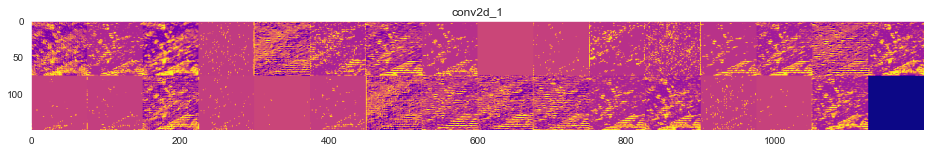

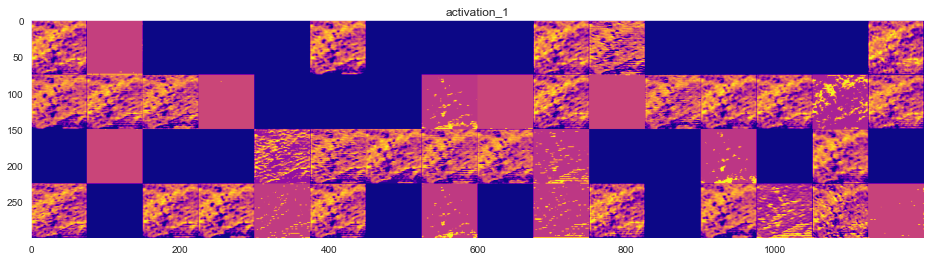

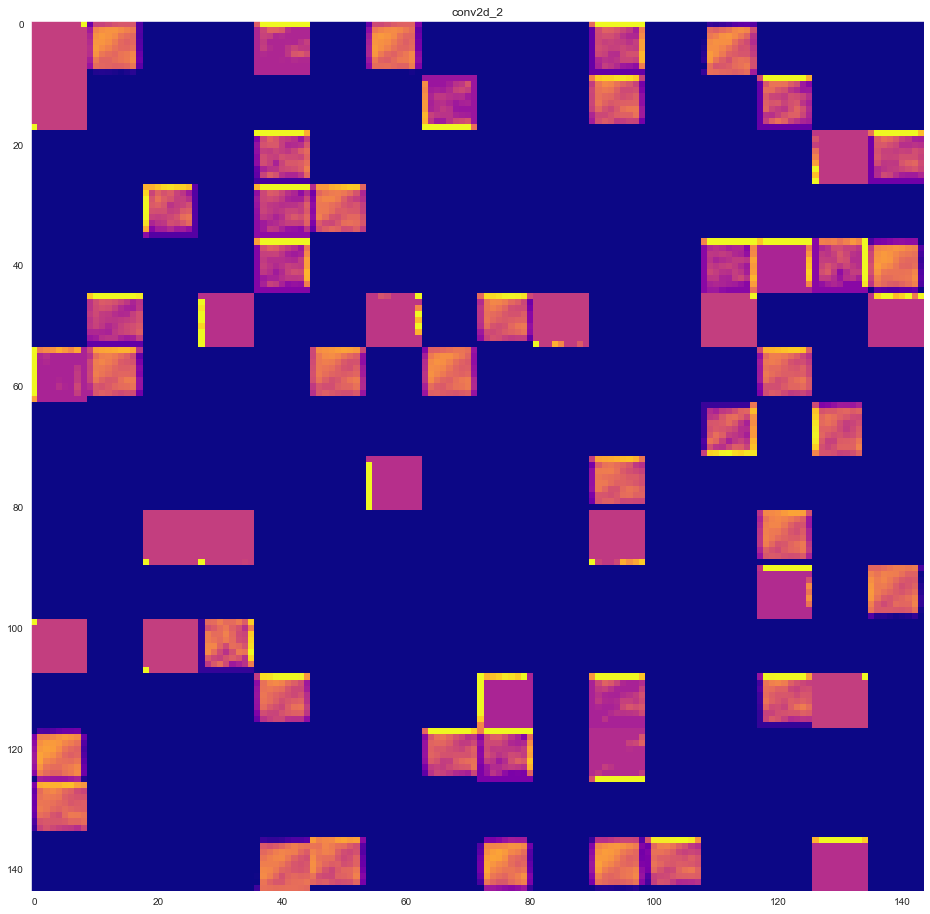

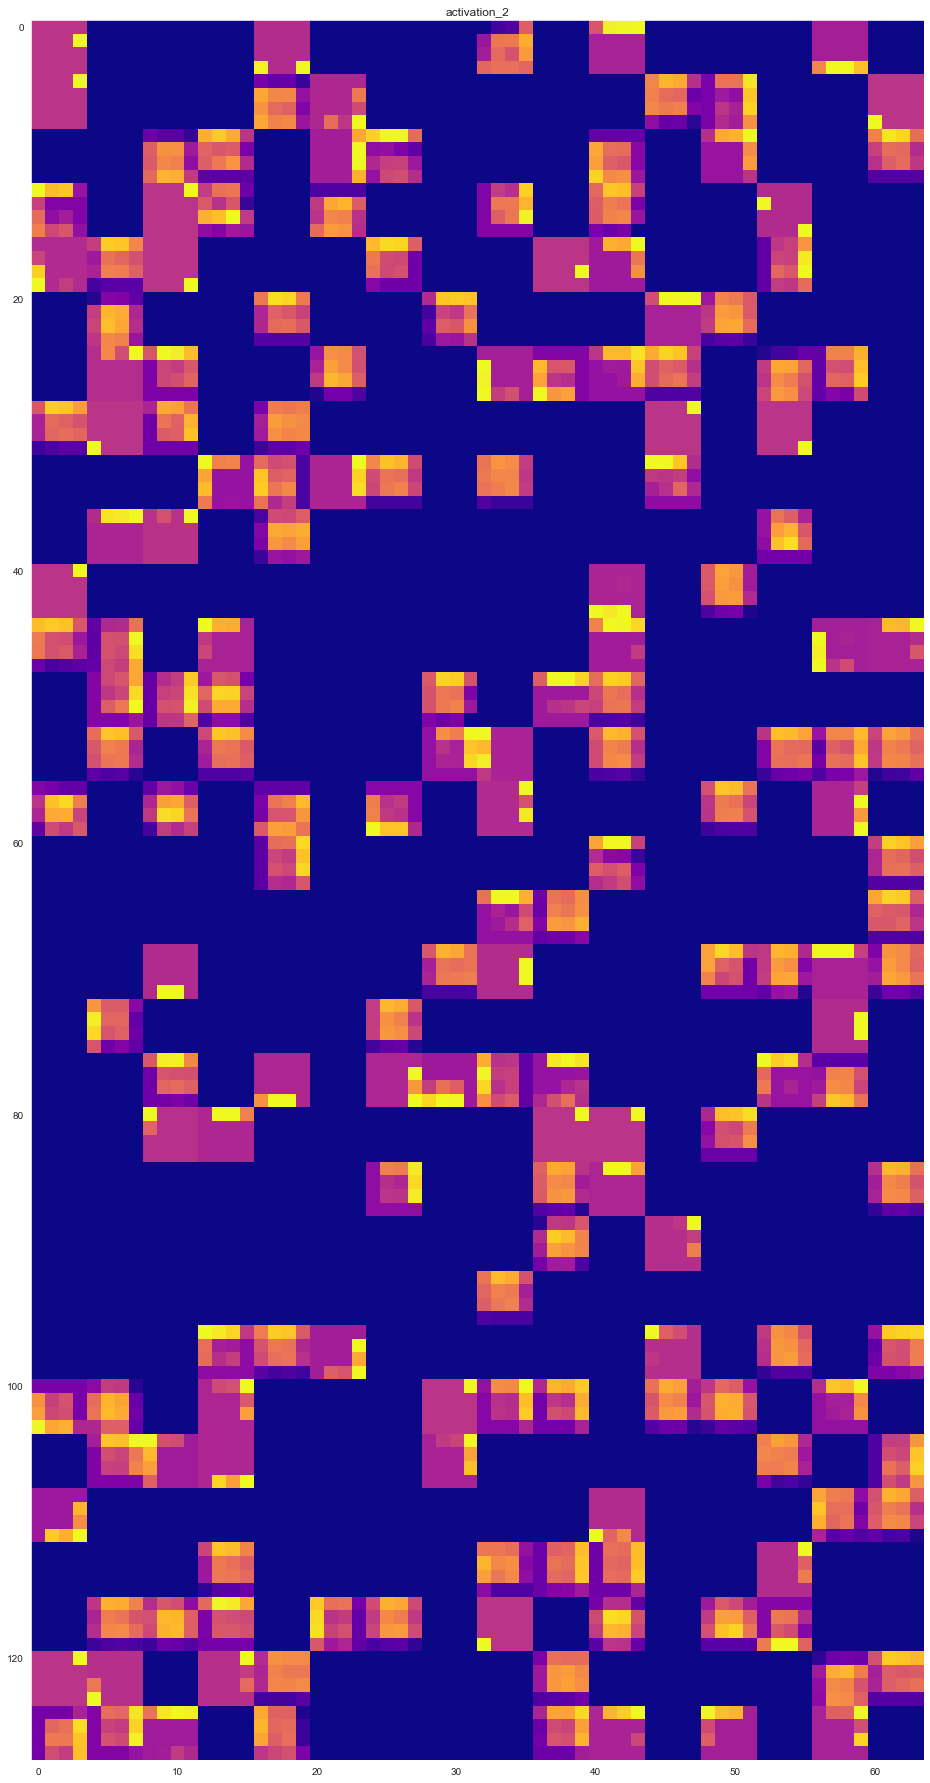

In [23]:
from keras.preprocessing import image
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:50]]
test_image = 'C:/Users/r04ra18/Desktop/Ramsey_Fold_Classification_3/TEST/chevron/download.jpg'

img = image.load_img(test_image, target_size=(img_size, img_size))
img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape(-1, img_size, img_size, 1)
# img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

layer_names = ['conv2d_1', 'activation_1', 'conv2d_2', 'activation_2', 'conv2d_5', 'activation_5']
activ_list = [activations[1], activations[3], activations[11], activations[13]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')